In [40]:
from pandas import read_csv
import numpy as np

In [41]:
df = read_csv('international-airline-passengers.csv',usecols = [1])
df

,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
0,112
1,118
2,132
3,129
4,121
5,135
6,148
7,148
8,136
9,119


In [42]:
values = df.values.astype('float')

In [43]:
train_size = int((values.shape[0]*0.67))
test_size = values.shape[0] - train_size
train = values[0:train_size]
test = values[train_size:]
train.shape

(96, 1)

In [44]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
train = scaler.fit_transform(train)
test = scaler.transform(test)

In [45]:
def create_dataset(data,k):
    dataX,dataY = [],[]
    for i in range(data.shape[0] - k):
        x = data[i:i + k,0]
        y = data[i+k,0]
        dataX.append(x)
        dataY.append(y)
    return np.array(dataX),np.array(dataY)

In [46]:
look_back = 12
trainX,trainY = create_dataset(train,look_back)
testX,testY = create_dataset(test,look_back)
trainX.shape

(84, 12)

In [47]:
trainY[0]

0.035598705501618144

In [48]:
trainX = np.reshape(trainX,(trainX.shape[0],trainX.shape[1],1))
testX = np.reshape(testX,(testX.shape[0],testX.shape[1],1))
trainX.shape

(84, 12, 1)

In [49]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense

In [50]:
model = Sequential()
model.add(SimpleRNN(4,input_shape = (look_back,1)))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')
model.fit(trainX,trainY,epochs = 20,batch_size  =1)

Epoch 1/20
84/84 [==============================] - 1s 8ms/step - loss: 0.0160
Epoch 2/20
84/84 [==============================] - 0s 5ms/step - loss: 0.0099
Epoch 3/20
84/84 [==============================] - 0s 5ms/step - loss: 0.0090
Epoch 4/20
84/84 [==============================] - 0s 4ms/step - loss: 0.0085
Epoch 5/20
84/84 [==============================] - 0s 4ms/step - loss: 0.0081
Epoch 6/20
84/84 [==============================] - 0s 4ms/step - loss: 0.0077
Epoch 7/20
84/84 [==============================] - 0s 4ms/step - loss: 0.0082
Epoch 8/20
84/84 [==============================] - 0s 5ms/step - loss: 0.0073
Epoch 9/20
84/84 [==============================] - 0s 5ms/step - loss: 0.0071
Epoch 10/20
84/84 [==============================] - 0s 4ms/step - loss: 0.0069
Epoch 11/20
84/84 [==============================] - 0s 5ms/step - loss: 0.0067
Epoch 12/20
84/84 [==============================] - 0s 4ms/step - loss: 0.0070
Epoch 13/20
84/84 [==============================

In [51]:
trainPredict = model.predict(trainX)
trainPredict = scaler.inverse_transform(trainPredict)

testPredict = model.predict(testX)
testPredict = scaler.inverse_transform(testPredict)

testY = scaler.inverse_transform([testY]).ravel()
testY,testPredict.ravel()

(array([340., 318., 362., 348., 363., 435., 491., 505., 404., 359., 310.,
        337., 360., 342., 406., 396., 420., 472., 548., 559., 463., 407.,
        362., 405., 417., 391., 419., 461., 472., 535., 622., 606., 508.,
        461., 390., 432.]),
 array([329.1469 , 332.62933, 303.6319 , 347.76395, 336.8163 , 339.1826 ,
        403.29813, 434.48724, 432.19348, 355.61356, 328.43445, 302.17004,
        326.37238, 350.30096, 323.86035, 377.6043 , 371.62112, 378.28156,
        422.7008 , 465.02155, 463.13416, 394.34344, 361.3532 , 338.27094,
        375.771  , 386.17007, 355.41553, 382.50333, 416.3564 , 414.1677 ,
        454.09323, 502.49814, 483.82428, 421.47293, 398.44165, 353.27383],
       dtype=float32))

<function matplotlib.pyplot.show(*args, **kw)>

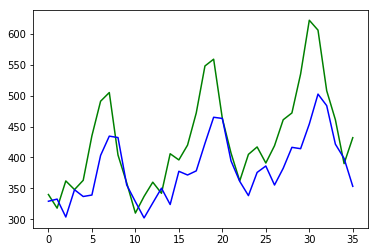

In [54]:
from matplotlib import pyplot as plt
plt.plot(testY , c = 'g')
plt.plot(testPredict, c = 'b')
plt.show